In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import numpy as np
import seaborn as sns

%matplotlib inline


In [2]:
#clustered_df = pd.read_csv("clustered_data_v2.csv")
clustered_df = pd.read_csv("clustered_data_v3.csv")
movies_df = pd.read_csv("movies.csv")

In [3]:
merged_df = clustered_df.merge(movies_df, on='id')

cluster_options = sorted(merged_df['cluster'].unique())

all_unique_genres = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance', 'science fiction', 'thriller', 'tv movie', 'war', 'western']

In [4]:
clusters = [str(i) for i in range(0, 101)]

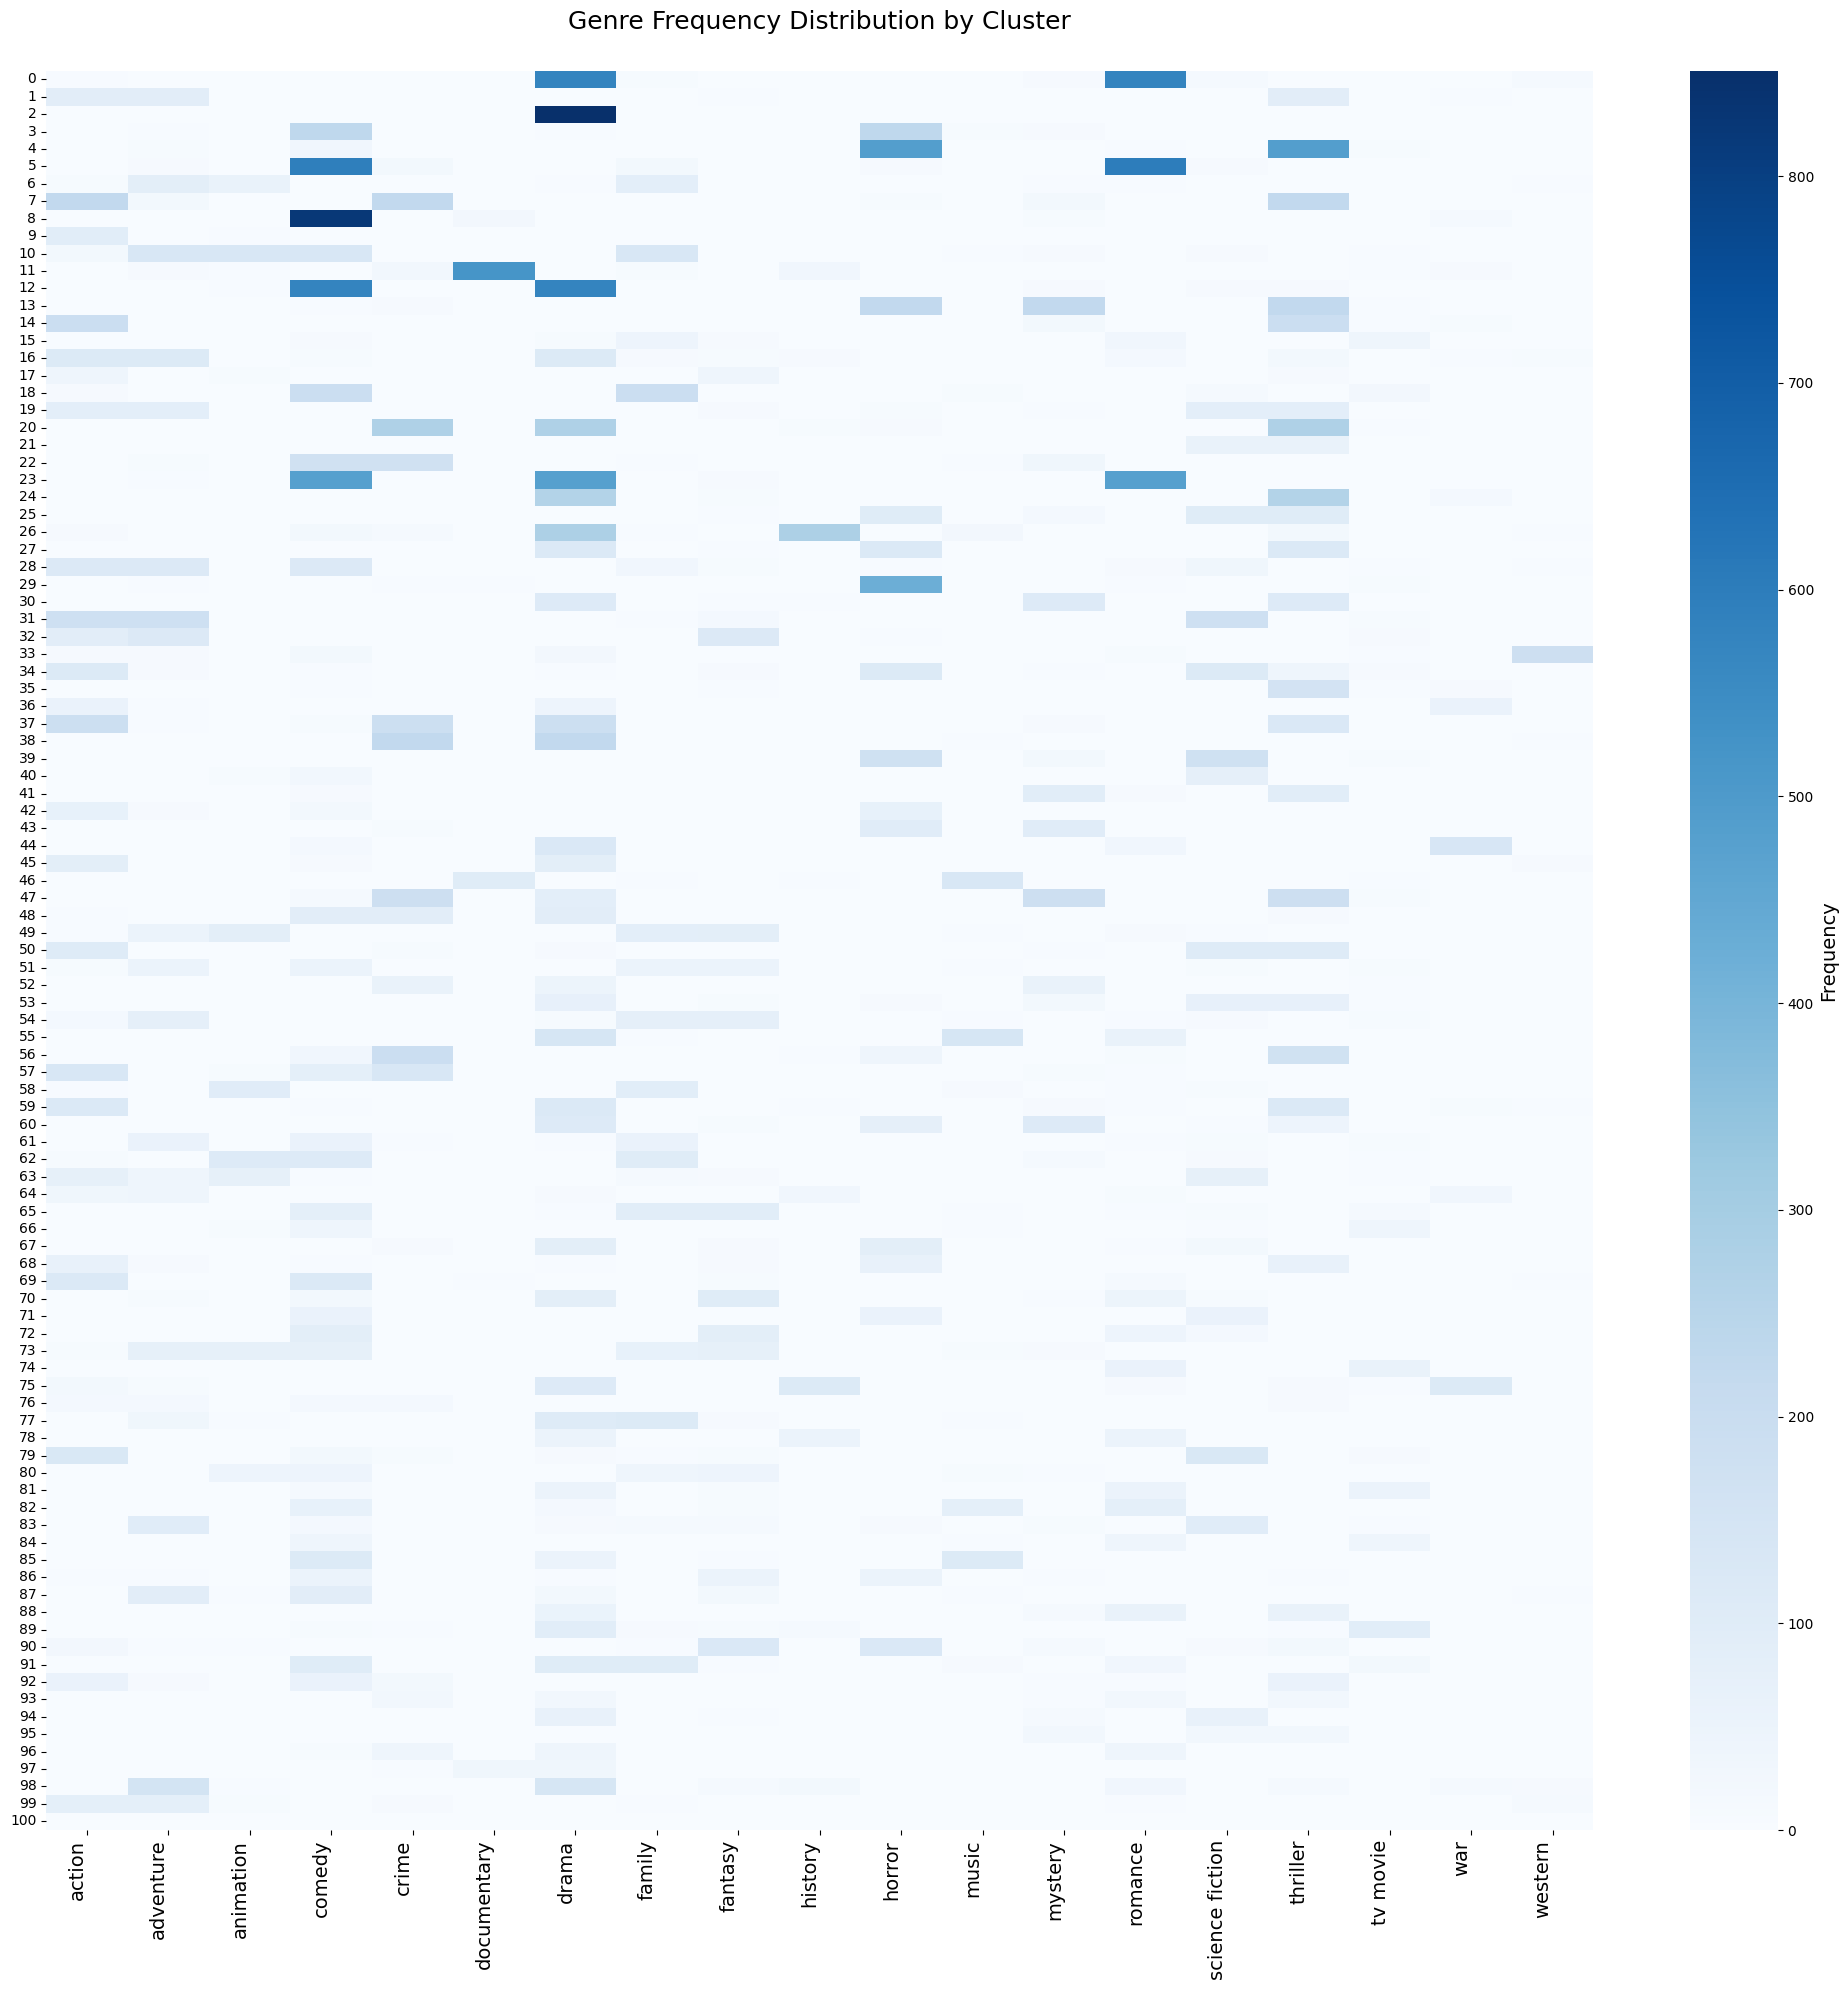

In [5]:
genre_matrix = []
for k in clusters:
    cluster_df = merged_df[merged_df['cluster'] == int(k)]

    genres_list = [genre.lower() for genres in cluster_df['genres'].dropna() for genre in genres.split(', ')]
    genres_counter = Counter(genres_list)
    genre_row = np.array([genres_counter.get(genre, 0) for genre in all_unique_genres])
    genre_matrix.append(genre_row)
    



fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(genre_matrix,  
            fmt='.0f',
            cmap='Blues',  # Using Blues colormap for better contrast
            xticklabels=all_unique_genres,
            yticklabels=clusters,
            ax=ax,
            cbar_kws={'label': 'Frequency'})


plt.xticks(rotation=90, ha='right', size=14) 
plt.yticks(size=10)  
ax.set_title('Genre Frequency Distribution by Cluster', pad=30, size=18) 
ax.figure.axes[-1].set_ylabel('Frequency', size=14)  

plt.tight_layout()
plt.show()